In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from costs import *
from lab_helpers import *
from plots_lab4 import *
from my_helpers import *
import pandas as pd
import matplotlib.pyplot as plt

## To Do Graphs
- PCA Decomposition + Classification
- Correlation
- Changing loss for different algorithms
- ???

## To Do tasks
- Manuel: implement K-fold to choose degree, change split data , ?
- Gabbo: ?
- Marco: ?

## Load the training data into feature matrix, class labels, and event ids:

In [34]:
DATA_TRAIN_PATH = '../data/train.csv'
y_or, tX_or, ids = load_csv_data(DATA_TRAIN_PATH)

In [168]:
y = y_or
tX = tX_or

## Data preprocessing

In [101]:
tX_pd = pd.read_csv('../data/train.csv')
tX_pd.drop(labels=['Id', 'Prediction'], axis=1, inplace=True)
tX_pd.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [102]:
tX_pd0 = tX_pd[tX_pd['PRI_jet_num']==0]
tX_pd1 = tX_pd[tX_pd['PRI_jet_num']==1]
tX_pd2 = tX_pd[tX_pd['PRI_jet_num']==2]
tX_pd3 = tX_pd[tX_pd['PRI_jet_num']==3]

In [103]:
tX_pds = [tX_pd0, tX_pd1, tX_pd2, tX_pd3]

In [104]:
#searching for nulls:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == -999].index.size
        if s > 0:
            print(s, i, c)
        i+=1

jet: 0
26123 0 DER_mass_MMC
99913 4 DER_deltaeta_jet_jet
99913 5 DER_mass_jet_jet
99913 6 DER_prodeta_jet_jet
99913 12 DER_lep_eta_centrality
99913 23 PRI_jet_leading_pt
99913 24 PRI_jet_leading_eta
99913 25 PRI_jet_leading_phi
99913 26 PRI_jet_subleading_pt
99913 27 PRI_jet_subleading_eta
99913 28 PRI_jet_subleading_phi
jet: 1
7562 0 DER_mass_MMC
77544 4 DER_deltaeta_jet_jet
77544 5 DER_mass_jet_jet
77544 6 DER_prodeta_jet_jet
77544 12 DER_lep_eta_centrality
77544 26 PRI_jet_subleading_pt
77544 27 PRI_jet_subleading_eta
77544 28 PRI_jet_subleading_phi
jet: 2
2952 0 DER_mass_MMC
jet: 3
1477 0 DER_mass_MMC


In [65]:
#searching for zeros:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == 0].index.size
        if s > 1000:
            print(s, i, c)
        i+=1

jet: 0
99913 22 PRI_jet_num
99913 29 PRI_jet_all_pt
jet: 1
jet: 2
9925 12 DER_lep_eta_centrality
jet: 3
5827 12 DER_lep_eta_centrality


In [169]:
tX_pd=pd.DataFrame(tX)
tX_pd0 = tX_pd[tX_pd[22]==0]
tX_pd1 = tX_pd[tX_pd[22]==1]
tX_pd2 = tX_pd[tX_pd[22]==2]
tX_pd3 = tX_pd[tX_pd[22]==3]
tX_pds = [tX_pd0, tX_pd1, tX_pd2, tX_pd3]

In [170]:
drops_0 = [4, 5, 6, 12, 23, 24, 25, 26, 27, 28, 29] # 29 all zeros
drops_1 = [4, 5, 6, 12, 26, 27, 28]
drop_22 = [22]
tX_pds[0].drop(drops_0, axis=1, inplace=True)
tX_pds[1].drop(drops_1, axis=1, inplace=True)
for jet in range(0, 4):
    tX_pds[jet].drop(drop_22, axis=1, inplace=True)

In [171]:
for jet in range(0, 4):
    tX_pd[jet].where(tX_pd[jet]!=-999, inplace=True)
    tX_pd[jet].fillna(tX_pd[jet].median(), inplace=True)

In [172]:
y_new0 = y[tX_pds[0].index.values]
y_new1 = y[tX_pds[1].index.values]
y_new2 = y[tX_pds[2].index.values]
y_new3 = y[tX_pds[3].index.values]
y_new = [y_new0, y_new1, y_new2, y_new3]

In [173]:
tX_new0 = tX_pds[0].values
tX_new1 = tX_pds[1].values
tX_new2 = tX_pds[2].values
tX_new3 = tX_pds[3].values
tX_new = [tX_new0, tX_new1, tX_new2, tX_new3]

In [174]:
ids0 = tX_pds[0].index.values
ids1 = tX_pds[1].index.values
ids2 = tX_pds[2].index.values
ids3 = tX_pds[3].index.values
ids = [ids0, ids1, ids2, ids3]

In [175]:
for jet in range(0,4):
    print(tX_new[jet].shape)

(99913, 18)
(77544, 22)
(50379, 29)
(22164, 29)


Normalize Data

In [177]:
means, stds = [], []
for jet in range (0, 4):
    tX_new[jet], mean, std = standardize(tX_new[jet])
    means.append(mean)
    stds.append(std)

Adding a column:

In [178]:
for jet in range(0,4):
    tX_new[jet] = np.c_[np.ones(tX_new[jet].shape[0]), tX_new[jet]]

Split Data

In [179]:
x_tr, x_te, y_tr, y_te = [], [], [], []

In [180]:
for jet in range(0,4):
    xtr, xte, ytr, yte = split_data(y_new[jet],tX_new[jet],0.8,1)
    x_tr.append(xtr)
    x_te.append(xte)
    y_tr.append(ytr)
    y_te.append(yte)

#### Stop Main Preprocessing

In [151]:
def cross_validation(y, x, k_indices, k, lambda_, degree, mean=True):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    
    # get k'th subgroup in test, others in train: TODO
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        #print(index_te, index_tr)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
        
        # form data with polynomial degree
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
        
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
        #w = least_squares(y_tr, x_tr_poly)
        
        # calculate the loss for train and test data
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        #print(lambda_, rmse_te)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
        
    if mean==True:
        loss_tr = np.mean(losses_tr)
        loss_te = np.mean(losses_te)
    else:
        loss_tr = losses_tr
        loss_te = losses_te
    return loss_tr, loss_te

In [182]:
k_indices = build_k_indices(y_tr[3], 8, 264)
cross_validation(y_tr[3], x_tr[3], k_indices, 8, 0.0001, 4)

(0.798902580540896, 1.2203432524042486)

0.7041252116104094
0.7042380151968517
0.7043858311412644
0.7045655509762518
0.7047672807923382
0.7049790549845106
0.7051946447681876
0.7054184473396046
0.7056628351943719
0.7059388046287444
0.7062465595118876
0.7065741837557518
0.7069059294338479
0.707232715135369
0.7075572125961525
0.7078937138025636
0.7082688136033688
0.7087270491003984
0.7093368031937478
0.7101819731779753
0.7113258732247854
0.7127569089395003
0.7143583440627039
0.7159403949424944
0.7173167203696103
0.7183669817535696
0.7190527250996134
0.7194002067249817
0.7194787529736388
0.7193923662611028
0.719288604483652
0.7193789804774946
0.7199607161784856
0.7214342447110549
0.7243093192111808
0.7291563599607089
0.7364281552459037
0.74617729977841
0.7579103056693146
0.7708181794738949
0.7842305010692168
0.797850893148035
0.8116115895702782
0.825416151129492
0.8390309122856741
0.8521251845568565
0.8643942659818447
0.8757436641956786
0.8864354912475741
0.8970275062732881


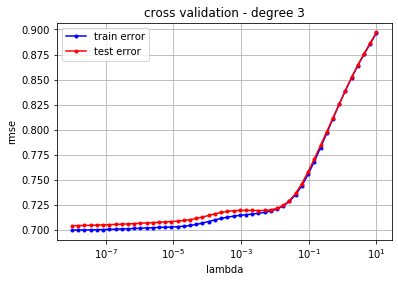

In [181]:
def cross_validation_demo():
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-8, 1, 50)
#     for d in range (1, degree+1):
#         for i in range (0, 3):
    #seed = i
    # split data in k fold
    #y_sub, x_sub = get_subsample(y_tr, x_tr, 10000, seed)
    seed = 1
    k_indices = build_k_indices(y_tr[0], k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y_tr[0], x_tr[0], k_indices, k_fold, lambda_, degree)
        #print(loss_te)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te, degree)

cross_validation_demo()

In [394]:
def select_best_degree(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 100000, seed)
    lambdas = np.logspace(-4, -1, 20)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        for lambda_ in lambdas:
            print(degree)
            loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
            print(loss_te)
            if loss_te < loss_min:
                loss_min = loss_te
                print("New loss: {}, degree: {}".format(loss_te, degree))
                degree_star = degree
                lambda_star = lambda_
    return degree_star, lambda_star

In [442]:
max_degree = 3
k_fold = 4
degree_star, lambda_star = select_best_degree(y_tr, x_tr, max_degree, k_fold, 165165623)
print("Best degree: {} with lambda = {}".format(degree_star, lambda_star))

1
[132804  89740  37022 ... 109134  30298 133442] [     0      1      3 ... 187496 187498 187499]
0.0001 0.8471231725695323
[137918  44085  82476 ... 157074  76245  75324] [     1      2      3 ... 187497 187498 187499]
0.0001 0.848236186069115
[116948 145481  57794 ...  12743  80472 129878] [     0      1      2 ... 187494 187496 187497]
0.0001 0.8481566417487494
[ 55620 161981 162872 ...  54584 139536  19192] [     0      2      5 ... 187497 187498 187499]
0.0001 0.847348495381365
0.8477161239421904
New loss: 0.8477161239421904, degree: 1
1
[132804  89740  37022 ... 109134  30298 133442] [     0      1      3 ... 187496 187498 187499]
0.0001438449888287663 0.8496504008832181
[137918  44085  82476 ... 157074  76245  75324] [     1      2      3 ... 187497 187498 187499]
0.0001438449888287663 0.8507207629399898
[116948 145481  57794 ...  12743  80472 129878] [     0      1      2 ... 187494 187496 187497]
0.0001438449888287663 0.8507210873619652
[ 55620 161981 162872 ...  54584 139536 

KeyboardInterrupt: 

In [305]:
def select_best_degree_ls(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 50000, seed)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, 0, degree)
        #print(degree, lambda_, loss_te)
        if loss_te < loss_min:
            loss_min = loss_te
            print("New loss: {}, degree: {}".format(loss_te, degree))
            degree_star = degree
    return degree_star

In [344]:
max_degree = 10
k_fold = 4
degree_star_ls = select_best_degree_ls(y_tr, x_tr, max_degree, k_fold, 264)
print("Best degree for least squares: {}".format(degree_star_ls))

New loss: 0.8352554444438645, degree: 1
New loss: 0.8074198480959829, degree: 2
New loss: 0.7970505329743582, degree: 3
New loss: 0.7967003079401784, degree: 4
Best degree for least squares: 4


## Start working

In [46]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [47]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=0.9198964473372747, loss=0.49991543478685996, w0=-3.1381702249274604e-05, w1=-1.870332018899931e-05
Gradient Descent(1/199): ||gradient||=0.9186848945865361, loss=0.4997636980245322, w0=-8.78042153832626e-05, w1=-5.236507656267239e-05
Gradient Descent(2/199): ||gradient||=0.9165086790795948, loss=0.4994921215723027, w0=-0.00018915591588298592, w1=-0.00011294257728487969
Gradient Descent(3/199): ||gradient||=0.9126063083581455, loss=0.4990082616199879, w0=-0.000370914263529803, w1=-0.0002219378872869192
Gradient Descent(4/199): ||gradient||=0.9056299309807633, loss=0.49815319084166065, w0=-0.0006959041130019329, w1=-0.00041798666987893115
Gradient Descent(5/199): ||gradient||=0.8932269289430593, loss=0.49666407351067016, w0=-0.0012739014639035493, w1=-0.0007704142328603178
Gradient Descent(6/199): ||gradient||=0.8713980371643467, loss=0.49413764114400255, w0=-0.002292032255140569, w1=-0.0014033062129404496
Gradient Descent(7/199): ||gradient||=0.833

In [48]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [49]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=3.819894318273993, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(1/99): |gradient|=3.313465869115332, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(2/99): |gradient|=2.7465500598415247, loss=0.5231169592050283, w0=0.006188461831573778, w1=-0.003969062074416842
SGD(3/99): |gradient|=3.2750457421264016, loss=0.49026883819335143, w0=-0.0036366473237117534, w1=-0.008645873148768043
SGD(4/99): |gradient|=3.648974628785057, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(5/99): |gradient|=3.4494660744980905, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(6/99): |gradient|=3.143628555043909, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(7/99): |gradient|=2.8915114659527927, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(8/99): |gradient|=2.897412774883511, loss=0.4714873513207

In [274]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [275]:
w_ls = least_squares(y, tX)
loss = compute_loss(y, tX, w_ls)
loss

0.34673788750013346

In [347]:
x_tr_poly = build_poly(x_tr, 4)
x_te_poly = build_poly(x_te, 4)
w_ls = least_squares(y_tr, x_tr_poly)
loss_tr = compute_loss(y_tr, x_tr_poly, w_ls)
loss_te = compute_loss(y_te, x_te_poly, w_ls)
rmse_te = compute_rmse(y_te, x_te_poly, w_ls)
rmse_tr = compute_rmse(y_tr, x_tr_poly, w_ls)
print(loss_tr, loss_te, rmse_tr, rmse_te)

0.3135299879473527 0.31508110848941073 0.7918711864278845 0.7938275738337774


In [113]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [125]:
w = []
for jet in range(0,4):
    x_tr, x_te, y_tr, y_te = split_data(y_new[jet],tX_new[jet],0.8,1)
    w.append(ridge_regression(y_tr, x_tr, 0.001))

In [123]:
x_tr_poly = build_poly(x_tr, 7)
x_te_poly = build_poly(x_te, 7)
lambda_ = 0.00001
w = ridge_regression(y_tr, x_tr_poly, lambda_)
loss_tr = compute_loss(y_tr, x_tr_poly, w)
loss_te = compute_loss(y_te, x_te_poly, w)
rmse_te = compute_rmse(y_te, x_te_poly, w)
rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
print(loss_tr, loss_te, rmse_tr, rmse_te)

0.24510851416621188 1026200624535.4009 0.7001550030760502 1432620.4134629667


In [124]:
lambda_ = 0.001
w = ridge_regression(y_tr, x_tr, lambda_)
loss_tr = compute_loss(y_tr, x_tr, w)
loss_te = compute_loss(y_te, x_te, w)
rmse_te = compute_rmse(y_te, x_te, w)
rmse_tr = compute_rmse(y_tr, x_tr, w)
print(loss_tr, loss_te, rmse_tr, rmse_te)

0.2891950223111849 0.2942724952626915 0.7605195885855733 0.7671668596370564


## Generate predictions and save ouput in csv format for submission:

#### Use Accuracy and F1 Score on our classification:

In [133]:
from sklearn.metrics import f1_score, accuracy_score

In [140]:
y_pred = np.zeros(250000)
for jet in range (0,4):
    y_p = predict_labels(w[jet], tX_new[jet])
    index = ids[jet]
    y_pred[index] = y_p
_, _, _, y_te = split_data(y, tX, 0.8, 1)
_, _, _, y_pred_test = split_data(y_pred, tX, 0.8, 1)

In [141]:
acc = accuracy_score(y_te, y_pred_test)
f1 = f1_score(y_te, y_pred_test)
print(acc, f1)

0.7473 0.5535493445461291


In [540]:
y_pred_test = predict_labels(w, x_te_poly)
acc = accuracy_score(y_te, y_pred_test)
f1 = f1_score(y_te, y_pred_test)
print(acc, f1)

0.790336 0.6746611053180397


In [62]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [15]:
OUTPUT_PATH = '../data/submission.csv'
tX_test_s, mean_tes, std_test = standardize(tX_test)
y_pred = predict_labels(w, tX_test_s)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [12]:
#we will need something like this

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])

NameError: name 'tX_test_s' is not defined